In [1]:
require(tidyverse)
require(DiagrammeR)
require(deSolve)

figsize = function(width,height)
    options(repr.plot.width=width, repr.plot.height=height)

theme_set(theme_bw(base_size = 20))

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: DiagrammeR

Loading required package: deSolve



Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


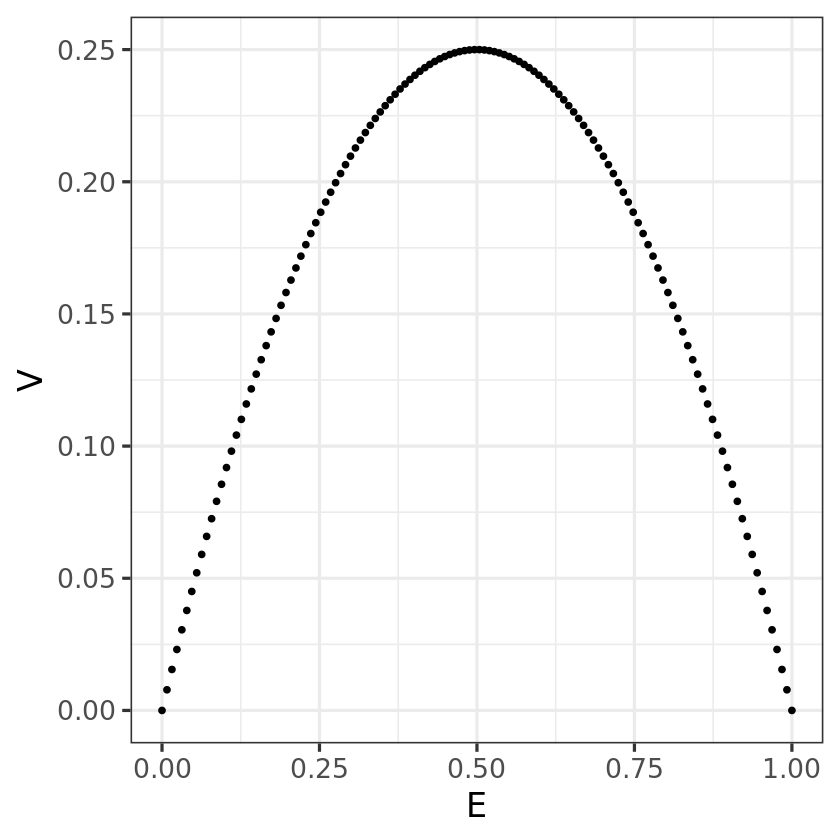

In [4]:
E = seq(0,1,length.out = 128)
V = 1/4 - (E-1/2)^2
qplot(E,V)

In [2]:
grViz('
digraph {
label = <J = I + ηA<br/>N = S + I + R + A>
subgraph {
    rank = same
    S -> I [label=<β(J/N)S>]
    I -> R [label=γI]
    R -> S [label=<<br/>μR>, constraint=false]
}

subgraph {
    R -> A [label=<β(J/N)R>]
    A -> R [label=γA]
}

subgraph {
    birth [label=<>, shape=none]
    birth -> S [label=<  bN>]
    S -> Dn [label=dS]
    I -> Dn [label=dI]
    R -> Dn [label=dR]
    A -> Dn [label=dA]
    I -> Dd [label=δI]
    A -> Dd [label=κδA]
}
}
', width=600, height=400)

HTML widgets cannot be represented in plain text (need html)

- birth rate $b$
- death rate $d$
- attack rate $\beta$
- generation interval $\displaystyle\frac{1}{\gamma}$
- infection fatality rate(IFR) $\delta$
- hazard ratio of IFR with reinfection $\kappa$


In [815]:
sol = ode(
    c(S=1-1e-6, I=1e-6, R=0, A=0, Dd=0, Dn=0),
    seq(0,365.25*20,length.out = 1000),
    \(t,u,p) {
        with(as.list(c(u,p)), {
            J = I + eta*A
            N = S + I + R + A
            list(c(
                b*N + mu*R - beta*(J/N)*S - d*S, # dS
                beta*(J/N)*S - d*I - delta*I - gamma*I, # dI
                gamma*I + gamma*A - beta*(J/N)*R - d*R - mu*R, # dR
                beta*(J/N)*R - gamma*A - d*A - kappa*delta*A, # dA
                delta*I + kappa*delta*A, # dDd
                d*S + d*I + d*R + d*A # dDn
            ))
        })
    },
    c(
        b=7.8/1000/365.25,
        d=12.7/1000/365.25,
        beta=3/5, gamma=1/5, mu=1/100, eta=.5,
        delta=.03/100,
        # delta=0,
        kappa=1/20
    )
)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 5706 rows containing missing values (`geom_line()`).”


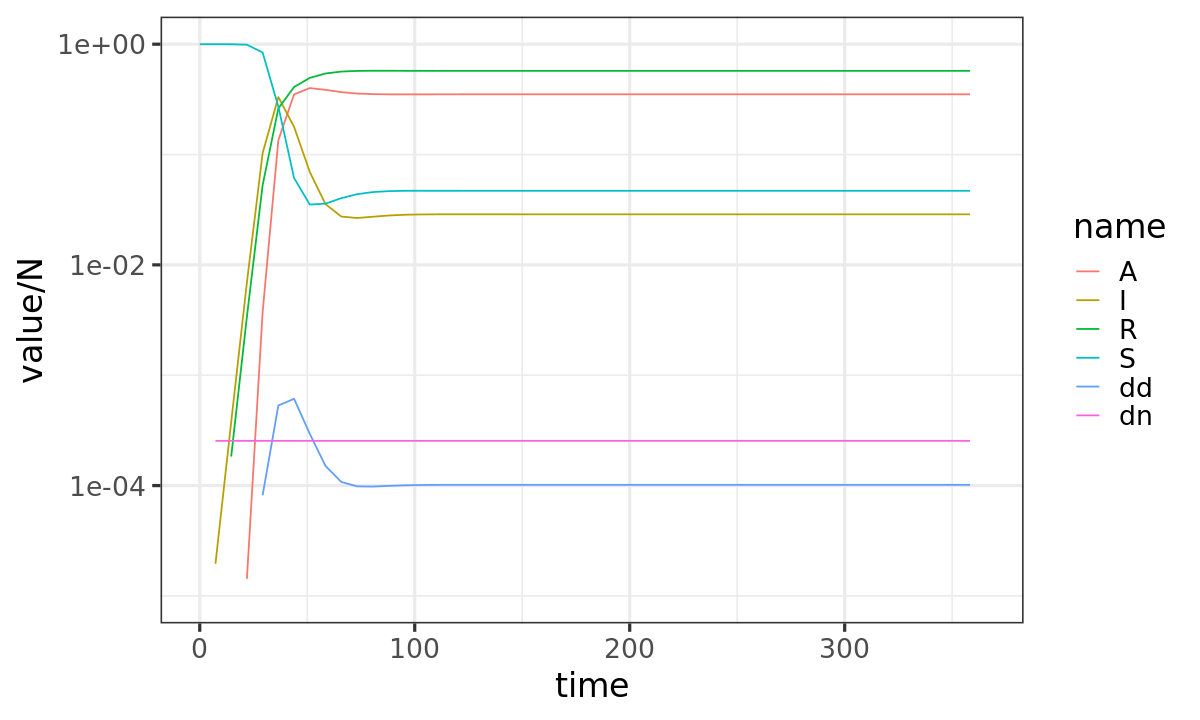

In [23]:
figsize(width=10, height=6)
data.frame(sol) %>%
    mutate(
        N = S+I+R+A,
        dd = Dd - lag(Dd),
        dn = Dn - lag(Dn),        
    ) %>%
    select(-Dd, -Dn) %>%
    pivot_longer(-c(time, N)) %>%
    ggplot() +
    geom_line(aes(time, value/N, col=name)) + 
    scale_y_log10(limit=c(1e-5, NA)) +
    scale_x_continuous(limit=c(NA, 365))

In [1136]:
f = \(e) {
    substitute(e)
}

In [1137]:
e = f({
    .(a) = a
})
e

{
    .(a) = a
}

In [1138]:
eth = \(x,n) nth(as.list(x), n)

In [1157]:
is.symbol

function (x)  .Primitive("is.language")

In [1160]:
e = q(.(a))

In [1163]:
ee = lapply(e, as.list)
ee

[[1]]
[[1]][[1]]
.


[[2]]
[[2]][[1]]
a



In [1166]:
ee[[1]][[1]]

.

In [1173]:
is.double(q(.))

[1] FALSE

In [1200]:
isGrammarSymbol

function (symbol) 
{
    if (typeof(symbol) != "symbol") 
        FALSE
    else switch(as.character(symbol), `{` = , `if` = , `for` = , 
        `while` = , `repeat` = , return = , `next` = , `break` = , 
        `<-` = , `<<-` = TRUE, FALSE)
}
<bytecode: 0x55c216966350>
<environment: namespace:methods>

In [1212]:
nth.language = \(x,i) nth(as.list(x), i)

In [150]:
q = quote
bq = bquote
dp = deparse
p = \(x) parse(text=x)

In [151]:
x = list()

In [153]:
x[dp(q(f))] = 1

In [148]:
x[stringq(f)]

ERROR: Error in x[q(f)]: invalid subscript type 'symbol'


In [184]:
is.ref = \(e) el(e,1) == '.' && is.symbol(el(e,2)) && length(e) == 2    
.pmatch = \(exp, pat, bs = list()) {
    # if(is.ref(pat)) {
    #     bs[deparse(el(pat,2))] = list(exp)
    #     return
    # }
    if(is.symbol(val) && is.symbol(pat) && el(val) == el(pat)) {
        return TRUE
    }    
    if(is.call(val) && is.call(pat) && el(val) == el(pat)) {
        .
    }    
}

In [182]:
.pmatch

\(exp, pat, bs = list()) {
    exp = substitute(exp)
    pat = substitute(pat)
    is.ref = \(e) el(e,1) == '.' && is.symbol(el(e,2)) && length(e) == 2    
    if(is.ref(pat)) {
        bs[deparse(el(pat,2))] = list(exp)
    }
    # if(is.symbol(val) && is.symbol(pat) && el(val) == el(pat))
    # if(is.call(val) && is.call(pat) && el(val) == el(pat))
    bs
}
<bytecode: 0x5580f0b856d8>

In [207]:
.pmatch(
    q(f(a,b)),
    q(f(a,b))
)

list()

In [169]:
.pmatch(a+2+3, .(f))$f

a + 2 + 3

In [77]:
?is.atomic

is.recursive               package:base                R Documentation

_I_s _a_n _O_b_j_e_c_t _A_t_o_m_i_c _o_r _R_e_c_u_r_s_i_v_e?

_D_e_s_c_r_i_p_t_i_o_n:

     ‘is.atomic’ returns ‘TRUE’ if ‘x’ is of an atomic type (or ‘NULL’)
     and ‘FALSE’ otherwise.

     ‘is.recursive’ returns ‘TRUE’ if ‘x’ has a recursive (list-like)
     structure and ‘FALSE’ otherwise.

_U_s_a_g_e:

     is.atomic(x)
     is.recursive(x)
     
_A_r_g_u_m_e_n_t_s:

       x: object to be tested.

_D_e_t_a_i_l_s:

     ‘is.atomic’ is true for the atomic types (‘"logical"’,
     ‘"integer"’, ‘"numeric"’, ‘"complex"’, ‘"character"’ and ‘"raw"’)
     and ‘NULL’.

     Most types of objects are regarded as recursive.  Exceptions are
     the atomic types, ‘NULL’, symbols (as given by ‘as.name’), ‘S4’
     objects with slots, external pointers, and-rarely visible from
     R-weak references and byte code, see ‘typeof’.

     It is common to call the atomic types ‘atomic vectors’, but note
     that ‘is.vector’ imposes further restrictions: an object can be
     atomic but not a vector (in that sense).

     These are primitive functions.

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_S_e_e _A_l_s_o:

     ‘is.list’, ‘is.language’, etc, and the ‘demo("is.things")’.

_E_x_a_m_p_l_e_s:

     require(stats)
     
     is.a.r <- function(x) c(is.atomic(x), is.recursive(x))
     
     is.a.r(c(a = 1, b = 3)) # TRUE FALSE
     is.a.r(list())          # FALSE TRUE - a list is a list
     is.a.r(list(2))         # FALSE TRUE
     is.a.r(lm)              # FALSE TRUE
     is.a.r(y ~ x)           # FALSE TRUE
     is.a.r(expression(x+1)) # FALSE TRUE
     is.a.r(quote(exp))      # FALSE FALSE

In [22]:
is.atomic(q(f(a,b)))

[1] FALSE

In [24]:
is.symbol(q(f))

[1] TRUE

In [23]:
is.symbol(q(f(a,b)))

[1] FALSE

In [25]:
is.language(q(f))

[1] TRUE

In [27]:
is.language(q(f(a,b)))

[1] TRUE

In [28]:
is.language(q(1))

[1] FALSE

In [50]:
?is.call

call                   package:base                    R Documentation

_F_u_n_c_t_i_o_n _C_a_l_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     Create or test for objects of ‘mode’ ‘"call"’ (or ‘"("’, see
     Details).

_U_s_a_g_e:

     call(name, ...)
     is.call(x)
     as.call(x)
     
_A_r_g_u_m_e_n_t_s:

    name: a non-empty character string naming the function to be
          called.

     ...: arguments to be part of the call.

       x: an arbitrary R object.

_D_e_t_a_i_l_s:

     ‘call’ returns an unevaluated function call, that is, an
          unevaluated expression which consists of the named function
          applied to the given arguments (‘name’ must be a string which
          gives the name of a function to be called).  Note that
          although the call is unevaluated, the arguments ‘...’ are
          evaluated.

          ‘call’ is a primitive, so the first argument is taken as
          ‘name’ and the remaining arguments as arguments for the
          constructed call: if the first argument is named the name
          must partially match ‘name’.

     ‘is.call’ is used to determine whether ‘x’ is a call (i.e., of
          mode ‘"call"’ or ‘"("’).  Note that

            • ‘is.call(x)’ is strictly equivalent to ‘typeof(x) ==
              "language"’.

            • ‘is.language()’ is also true for calls (but also for
              ‘symbol’s and ‘expression’s where ‘is.call()’ is false).

     ‘as.call(x)’: Objects of mode ‘"list"’ can be coerced to mode
          ‘"call"’.  The first element of the list becomes the function
          part of the call, so should be a function or the name of one
          (as a symbol; a character string will not do).

          If you think of using ‘as.call(<string>)’, consider using
          ‘str2lang(*)’ which is an efficient version of
          ‘parse(text=*)’.  Note that ‘call()’ and ‘as.call()’, when
          applicable, are much preferable to these ‘parse()’ based
          approaches.

     All three are primitive functions.

     ‘as.call’ is generic: you can write methods to handle specific
     classes of objects, see InternalMethods.

_W_a_r_n_i_n_g:

     ‘call’ should not be used to attempt to evade restrictions on the
     use of ‘.Internal’ and other non-API calls.

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_S_e_e _A_l_s_o:

     ‘do.call’ for calling a function by name and argument list;
     ‘Recall’ for recursive calling of functions; further
     ‘is.language’, ‘expression’, ‘function’.

     Producing ‘call’s etc from character: ‘str2lang’ and ‘parse’.

_E_x_a_m_p_l_e_s:

     is.call(call) #-> FALSE: Functions are NOT calls
     
     ## set up a function call to round with argument 10.5
     cl <- call("round", 10.5)
     is.call(cl) # TRUE
     cl
     identical(quote(round(10.5)), # <- less functional, but the same
               cl) # TRUE
     ## such a call can also be evaluated.
     eval(cl) # [1] 10
     
     class(cl) # "call"
     typeof(cl)# "language"
     is.call(cl) && is.language(cl) # always TRUE for "call"s
     
     A <- 10.5
     call("round", A)        # round(10.5)
     call("round", quote(A)) # round(A)
     f <- "round"
     call(f, quote(A))       # round(A)
     ## if we want to supply a function we need to use as.call or similar
     f <- round
     ## Not run: call(f, quote(A))  # error: first arg must be character
     (g <- as.call(list(f, quote(A))))
     eval(g)
     ## alternatively but less transparently
     g <- list(f, quote(A))
     mode(g) <- "call"
     g
     eval(g)
     ## see also the examples in the help for do.call

In [63]:
pcase = \(...) {
    list(...)
}

In [66]:
pcasfe(list(a,b) ~ )

[1] "language"

In [14]:
el(e,1)

`{`

In [1294]:
q({ f(a,b) })

{
    f(a, b)
}

In [ ]:
typeof(as.list(s))

[1] "list"

In [ ]:
as.list(as.list(e)[[2]])

[[1]]
`=`

[[2]]
N

[[3]]
S + I + R + A


In [ ]:
bquote(list( ..(s) ), splice = TRUE)

list((N = S + I + R + A), (I = I + eta * A))

In [ ]:
as.list(e)

[[1]]
`{`

[[2]]
N = S + I + R + A

[[3]]
I = I + eta * A


In [ ]:
make.model = function(
move = \(from,to,count) {
    list(from=substitute(from),
         to=substitute(to),
         count=substitute(count)) |> `class<-`('Edge')
}

print.Edge = \(t) { 
    print(glue('{deparse(t$from)} -> {deparse(t$to)} [label=<{deparse(t$count)}>]'))
    invisible(t)
}

make.model = function(edges) {
    states = list()
    for(e in edges) {
        from = deparse(e$from)
        states[[from]] = append(states[[from]], bquote(- .(e$count)))
        to = deparse(e$to)
        states[[to]] = append(states[[to]], e$count)
    }

    du = expression()
    for(s in names(states)) {
        fml = reduce(states[[s]], \(acc,x) bquote(.(acc) + .(x)))
        du = append(du, bquote(.du[.(s)] <<- .(fml)))
    }

    bquote(
        function(t,u,p) {
            .du = c()
            with(as.list(c(u,p)), {
                ..(du)
            })
            list(.du[names(u)])
        }
    , splice=TRUE) %>% eval
}


ERROR: Error in eval(expr, envir, enclos): object 'eq' not found


In [873]:
edges = list(
    move(S, I, beta*S*(I+eta*A)),
    move(I, R, gamma*I),
    move(R, S, mu*R),
    move(R, A, beta*R*(I+eta*A)),
    move(A, R, gamma*A)
)
make.model(edges)

function(t,u,p) {
            .du = c()
            with(as.list(c(u,p)), {
                ..(du)
            })
            list(.du[names(u)])
        }
<environment: 0x55c21bc0d0e0>

In [866]:
u0 = c(S=1-1e-6, I=1e-6, R=0, A=0)
ts = seq(0,365.25*30,by=1)
ps = c(beta=2/5, gamma=1/5, mu=1/100, eta=1/2)    
sol = ode(u0, ts, make.model(edges), ps)

In [867]:
sol

time  S         I            R            A           
 [1,]  0    0.9999990 1.000000e-06 0.000000e+00 0.000000e+00
 [2,]  1    0.9999986 1.222200e-06 2.210955e-07 4.904927e-14
 [3,]  2    0.9999980 1.493726e-06 4.890754e-07 2.217671e-13
 [4,]  3    0.9999974 1.825553e-06 8.143907e-07 5.839712e-13
 [5,]  4    0.9999966 2.231094e-06 1.209818e-06 1.237923e-12
 [6,]  5    0.9999956 2.726723e-06 1.690952e-06 2.340480e-12
 [7,]  6    0.9999944 3.332453e-06 2.276856e-06 4.130597e-12
 [8,]  7    0.9999929 4.072742e-06 2.990822e-06 6.970484e-12
 [9,]  8    0.9999912 4.977479e-06 3.861321e-06 1.140726e-11
[10,]  9    0.9999890 6.083196e-06 4.923143e-06 1.826528e-11
[11,] 10    0.9999863 7.434534e-06 6.218809e-06 2.878427e-11
[12,] 11    0.9999831 9.086053e-06 7.800284e-06 4.482599e-11
[13,] 12    0.9999792 1.110443e-05 9.731073e-06 6.918327e-11
[14,] 13    0.9999743 1.357115e-05 1.208879e-05 1.060420e-10
[15,] 14    0.9999684 1.658579e-05 1.496828e-05 1.616715e-10
[16,] 15    0.9999612 2.027005e-05 1.848546e-05 2.454568e-10
[17,] 16    0.9999524 2.477263e-05 2.278197e-05 3.714406e-10
[18,] 17    0.9999417 3.027527e-05 2.803094e-05 5.606268e-10
[19,] 18    0.9999286 3.700005e-05 3.444389e-05 8.444230e-10
[20,] 19    0.9999125 4.521831e-05 4.227933e-05 1.269782e-09
[21,] 20    0.9998929 5.526163e-05 5.185316e-05 1.906880e-09
[22,] 21    0.9998689 6.753515e-05 6.355135e-05 2.860590e-09
[23,] 22    0.9998397 8.246545e-05 7.778038e-05 4.267063e-09
[24,] 23    0.9998041 1.007226e-04 9.517875e-05 6.378893e-09
[25,] 24    0.9997605 1.230217e-04 1.164280e-04 9.534464e-09
[26,] 25    0.9997074 1.502537e-04 1.423774e-04 1.424675e-08
[27,] 26    0.9996424 1.835102e-04 1.740677e-04 2.128244e-08
[28,] 27    0.9995631 2.241223e-04 2.127681e-04 3.178460e-08
[29,] 28    0.9994662 2.737139e-04 2.600277e-04 4.745805e-08
[30,] 29    0.9993479 3.342667e-04 3.177374e-04 7.084514e-08
[31,] ⋮     ⋮         ⋮            ⋮            ⋮           
[32,] 10928 0.1666667 0.03333333   0.6666667    0.1333333   
[33,] 10929 0.1666667 0.03333333   0.6666667    0.1333333   
[34,] 10930 0.1666667 0.03333333   0.6666667    0.1333333   
[35,] 10931 0.1666667 0.03333333   0.6666667    0.1333333   
[36,] 10932 0.1666667 0.03333333   0.6666667    0.1333333   
[37,] 10933 0.1666667 0.03333333   0.6666667    0.1333333   
[38,] 10934 0.1666667 0.03333333   0.6666667    0.1333333   
[39,] 10935 0.1666667 0.03333333   0.6666667    0.1333333   
[40,] 10936 0.1666667 0.03333333   0.6666667    0.1333333   
[41,] 10937 0.1666667 0.03333333   0.6666667    0.1333333   
[42,] 10938 0.1666667 0.03333333   0.6666667    0.1333333   
[43,] 10939 0.1666667 0.03333333   0.6666667    0.1333333   
[44,] 10940 0.1666667 0.03333333   0.6666667    0.1333333   
[45,] 10941 0.1666667 0.03333333   0.6666667    0.1333333   
[46,] 10942 0.1666667 0.03333333   0.6666667    0.1333333   
[47,] 10943 0.1666667 0.03333333   0.6666667    0.1333333   
[48,] 10944 0.1666667 0.03333333   0.6666667    0.1333333   
[49,] 10945 0.1666667 0.03333333   0.6666667    0.1333333   
[50,] 10946 0.1666667 0.03333333   0.6666667    0.1333333   
[51,] 10947 0.1666667 0.03333333   0.6666667    0.1333333   
[52,] 10948 0.1666667 0.03333333   0.6666667    0.1333333   
[53,] 10949 0.1666667 0.03333333   0.6666667    0.1333333   
[54,] 10950 0.1666667 0.03333333   0.6666667    0.1333333   
[55,] 10951 0.1666667 0.03333333   0.6666667    0.1333333   
[56,] 10952 0.1666667 0.03333333   0.6666667    0.1333333   
[57,] 10953 0.1666667 0.03333333   0.6666667    0.1333333   
[58,] 10954 0.1666667 0.03333333   0.6666667    0.1333333   
[59,] 10955 0.1666667 0.03333333   0.6666667    0.1333333   
[60,] 10956 0.1666667 0.03333333   0.6666667    0.1333333   
[61,] 10957 0.1666667 0.03333333   0.6666667    0.1333333

In [689]:
s = expression(A = 1, B = 1)
bquote(list(..(s)), splice=TRUE)

list(A = 1, B = 1)

In [685]:

states

$R
-(beta * R * (I + eta * A)) + gamma * A + gamma * I + -(mu * 
    R)

$A
beta * R * (I + eta * A) + -(gamma * A)

$S
-(beta * S * (I + eta * A)) + mu * R

$I
beta * S * (I + eta * A) + -(gamma * I)


In [682]:
m(0, c(S=1, I=0, R=0, A=0), c(beta=2/5, eta=1, gamma=1/5, mu=1/100))

$R
-(beta * R * (I + eta * A)) + gamma * A + gamma * I + -(mu * 
    R)

$A
beta * R * (I + eta * A) + -(gamma * A)

$S
-(beta * S * (I + eta * A)) + mu * R

$I
beta * S * (I + eta * A) + -(gamma * I)



list()

In [608]:
S = 1-1e-6
I = 1e-6
R = 0
A = 0

beta = 2/5
mu = 1/100
eta = 1/2

eval(states[['S']])

[1] -3.999996e-07

In [645]:
f = str_interp('function() { ${deparse(states[["S"]])} }') %>%
    parse(text=.) %>%
    eval

In [659]:
f()

[1] -3.999996e-07

In [626]:
args = expression(a,b,c)
bquote(\(..(args)) {})

ERROR: Error in parse(text = x, srcfile = src): <text>:2:10: unexpected '{'
1: args = expression(a,b,c)
2: bquote(\({
            ^


In [620]:
bquote(..(parse(text=names(states))), splice=TRUE)

ERROR: Error: can only splice inside a call


In [609]:
f = \(a,b) { a-b }

In [298]:
reduce(states, \(acc,s) bquote(.(acc) .(s)))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:39: unexpected symbol
1: reduce(states, \(acc,s) bquote(.(acc) .
                                          ^


In [320]:
bquote(.(states[[1]]) + .(states[[2]]))

+S + -I

In [304]:
a = quote(S)
s = list(S=1)

In [323]:
bquote(s[.(deparse(a))])

s["S"]

In [324]:
f = \(a=0,b) a+b

In [312]:
s[a]

ERROR: Error in s[a]: invalid subscript type 'symbol'


In [309]:
bquote(.(a))

S

In [302]:
bquote(.(a)    /.(b))

1/2

In [179]:
SI = move(S, I, beta*S*I)

In [198]:
require(glue)
bquote(.(glue("d{SI$from}")) <- -.(SI$count))

"dS" <- -(beta * S * I)

In [163]:
quote(A), quote(B)

[[1]]
A

[[2]]
B


In [158]:
S = 1

In [ ]:
build = \(spec) {
}

In [103]:
parse(text='x + b')

expression(x + b)

In [126]:
f = \(e) {
    substitute(e)
    # parse(text=deparse(substitute(e)))
    # substitute(fn(e), list(e=substitute(e, list(x=1))))
}

In [142]:
f = \(x) substitute(x)
g = \(x) substitute(f(x))

In [143]:
g(x + y^2)

f(x + y^2)

In [45]:
substitute(a = x + 1, list(x=1, a=2))

ERROR: Error in substitute(a = x + 1, list(x = 1, a = 2)): unused argument (a = x + 1)


In [3]:
require(tidyverse)
require(survival)
require(survminer)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: survival

Loading required package: survminer

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




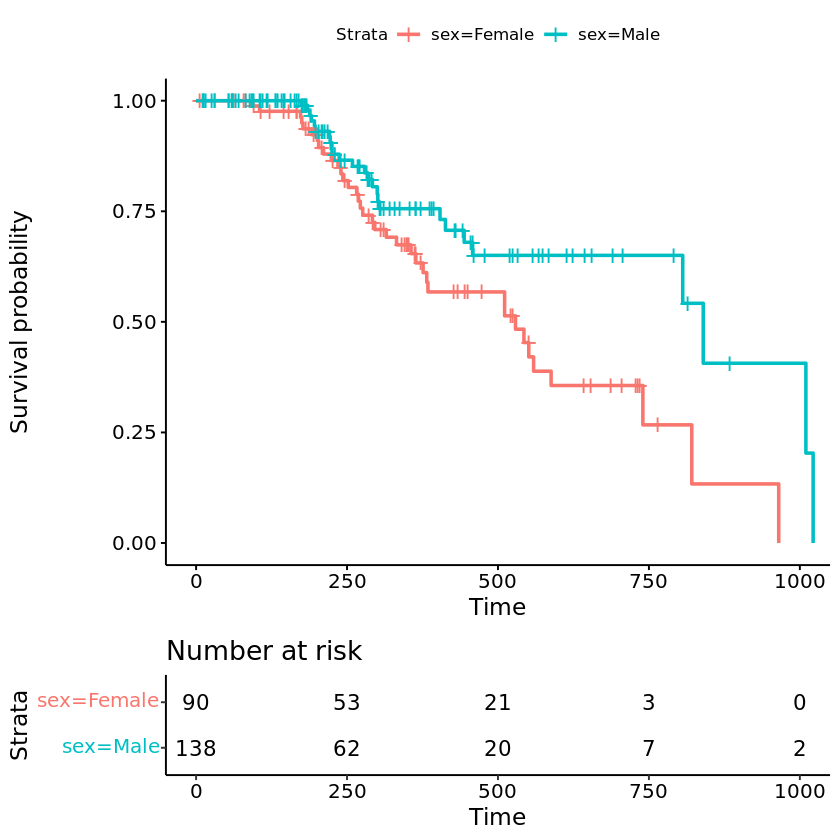

In [12]:
lung %>%
    mutate(
        status = ifelse(status == 1, TRUE, FALSE),
        sex = case_when(
                sex == 1 ~ 'Male',
                sex == 2 ~ 'Female',
                TRUE ~ NA,
            )
    ) -> df

fit = survfit(Surv(time,status) ~ sex, data=df)
ggsurvplot(fit, data=df, risk.table=TRUE)

In [2]:

m = log(7.9)

In [3]:
2log(mean/median) = s^2

[1] 2.066863

In [4]:
v = 2*log(9.7/7.9)

In [5]:
v

[1] 0.4105263

In [ ]:
9.7 = exp(m + s^2/2)
7.9 = exp(m)


In [3]:
read_csv('the-unmitigated-profile-of-covid-19-infectiousness/Data/Results/ml_estiamte.csv')

New names:
• `` -> `...1`
Rows: 1 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): run_name, dataset, infectivity
dbl (7): ...1, period, growth_rate, corr, gen_shape, gen_scale, log_llk
lgl (1): seed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 run_name                       dataset period infectivity growth_rate
1 0    ('refined', 47, 'logbiv', 0.1) refined 47     logbiv      0.1        
  seed corr      gen_shape gen_scale log_llk 
1 NA   0.7484248 0.6427132 7.872346  289.7438

In [4]:
read_csv('the-unmitigated-profile-of-covid-19-infectiousness/Data/Results/model_comparison.csv')

New names:
• `` -> `...1`
Rows: 6 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): run_name, dataset, infectivity
dbl (7): ...1, period, growth_rate, corr, gen_shape, gen_scale, log_llk
lgl (1): seed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 run_name                                dataset period infectivity    
1 0    ('refined', 47, 'logbiv', 0.1)          refined 47     logbiv         
2 1    ('refined', 47, 'logist_no_loc', 0.1)   refined 47     logist_no_loc  
3 2    ('refined', 47, 'logist_with_loc', 0.1) refined 47     logist_with_loc
4 3    ('ferr', 47, 'logbiv', 0)               ferr    47     logbiv         
5 4    ('ferr', 47, 'logist_no_loc', 0)        ferr    47     logist_no_loc  
6 5    ('ferr', 47, 'logist_with_loc', 0)      ferr    47     logist_with_loc
  growth_rate seed corr       gen_shape  gen_scale  log_llk 
1 0.1         NA    0.7484248 0.64271319  7.8723464 289.7438
2 0.1         NA    0.5000000 2.09398967  0.2529587 293.8575
3 0.1         NA    1.9503629 2.67582282 17.3722581 291.4198
4 0.0         NA    0.8207996 0.63283734  4.1414824 512.6926
5 0.0         NA    0.5000000 0.01039954  0.0100000 516.2264
6 0.0         NA   -0.9040931 1.15149243  2.4432827 512.9696

In [6]:
7.87

[1] 7.87

In [17]:
packageVersion('dplyr')

[1] ‘1.1.0’

In [5]:
require(patchwork)

Loading required package: patchwork



In [19]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
figsize = \(width, height) options(repr.plot.width=width, repr.plot.height=height)

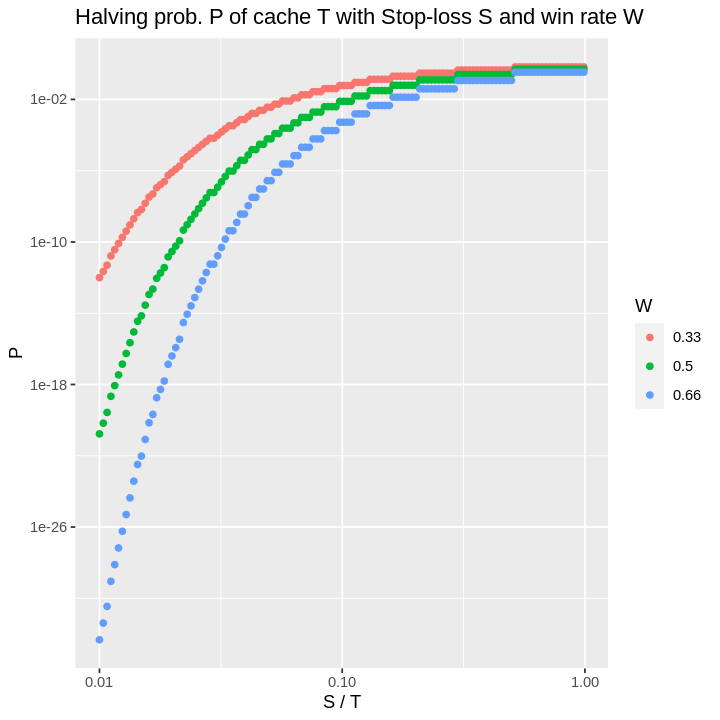

In [45]:
w = c(.33,.50,.66)
k = 10**seq(log10(.01),log10(.99), length.out = 128)# seq(.01, .99, length.out = 128)
crossing(w,k) %>%
    mutate(
        n = ceiling(-1/log2(1-k)),
        prob = (1-w)**n
    ) %>%
ggplot() +
    geom_point(aes(k, prob, color=factor(w))) +
    scale_x_log10() +
    scale_y_log10() +
    labs(
        title = 'Halving prob. P of cache T with Stop-loss S and win rate W',
        y = 'P',
        x = 'S / T',
        color = 'W'
    ) -> g

figsize(6,6)
g

In [7]:
n = 100

E = rnorm(n)
x = mean(E)
v = var(E) * n/(n-1)

In [20]:
for(a in 1:10) {}

In [31]:
a = c()

In [33]:
a

NULL

In [47]:
calcD = function(deltas, alpha) {
    n = length(deltas)    
    deltas = sample(deltas)
    D = deltas[1]
    for(i in 2:floor(alpha*n)) {
        D = c(max(D[1], deltas[i][1]),  min(D[2], deltas[i][2]))
    }
    # D = c(D)
    # for(i in (floor(alpha*n)+1):n) {            
    #     for(d in D) {
    #         append(D, c(d[1],  min(d[2], deltas[i][1])))
    #         append(D, c(max(d[1], deltas[i][2]),  d[2]))
    #     }
    # }
    D
}

In [50]:
deltas = c(c(1,3),c(2,4))

[1] 3 2 1 4

In [49]:
calcD(, 1)

[1]  4 NA

Warning message:
“Removed 14771 rows containing non-finite values (stat_density2d_filled).”


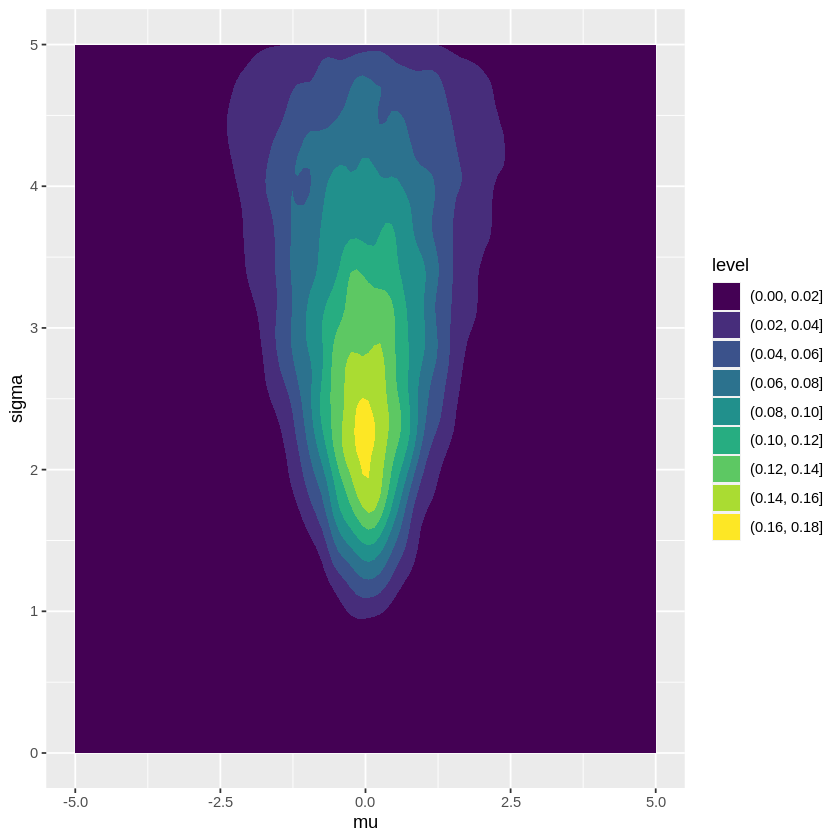

In [8]:
mu0 = 0
v = 10
alpha = 1/2 + 10/5
beta = 10

n = 1024*32

sigma = 1 / rgamma(n, shape=alpha, rate=beta)
mu = rnorm(n, mean=mu0, sd=sigma/sqrt(v))

data.frame(sigma, mu) %>%
ggplot() +
    geom_density_2d_filled(aes(mu, sigma)) +
    lims(x=c(-5,5), y=c(0,5))

Warning message:
“Removed 7469 rows containing non-finite values (stat_density2d_filled).”


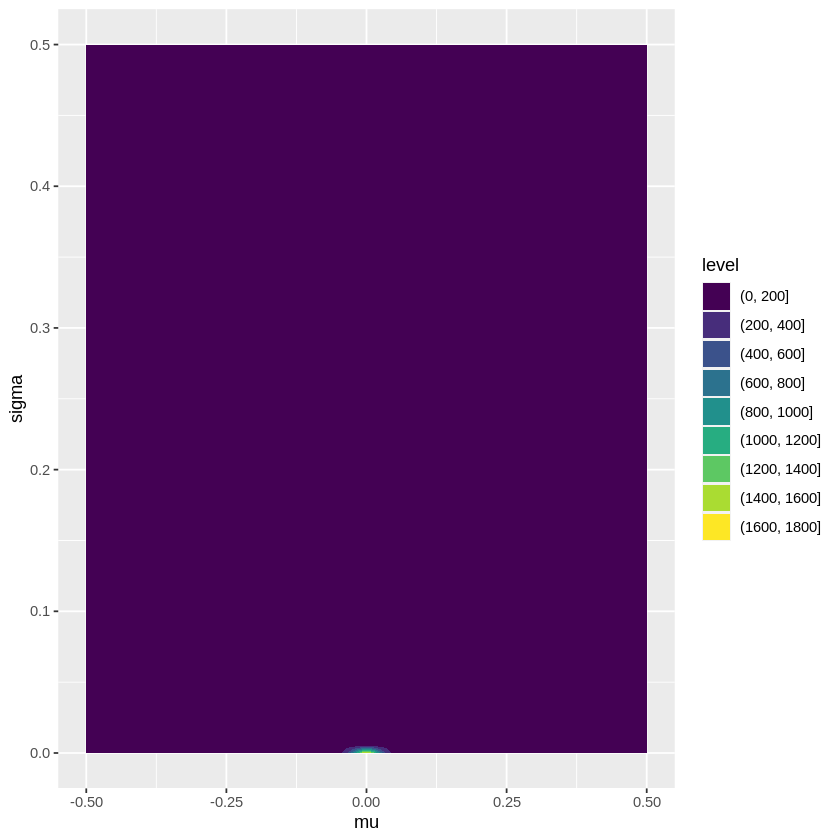

In [10]:
mu0 = 0
v = .001
alpha = 1/2
beta = .001

n = 1024*32

sigma = 1 / rgamma(n, shape=alpha, rate=beta)
mu = rnorm(n, mean=mu0, sd=sigma/sqrt(v))

data.frame(sigma, mu) %>%
ggplot() +
    geom_density_2d_filled(aes(mu, sigma)) +
    lims(x=c(-.5,.5), y=c(0,.5))

In [2]:
dng = \(mu0,v,alpha,beta) \(mu,sigma)
    dnorm(mu, mean=mu0, sd=sigma/sqrt(v)) *
    dgamma(1/sigma^2, shape=alpha, rate=beta)

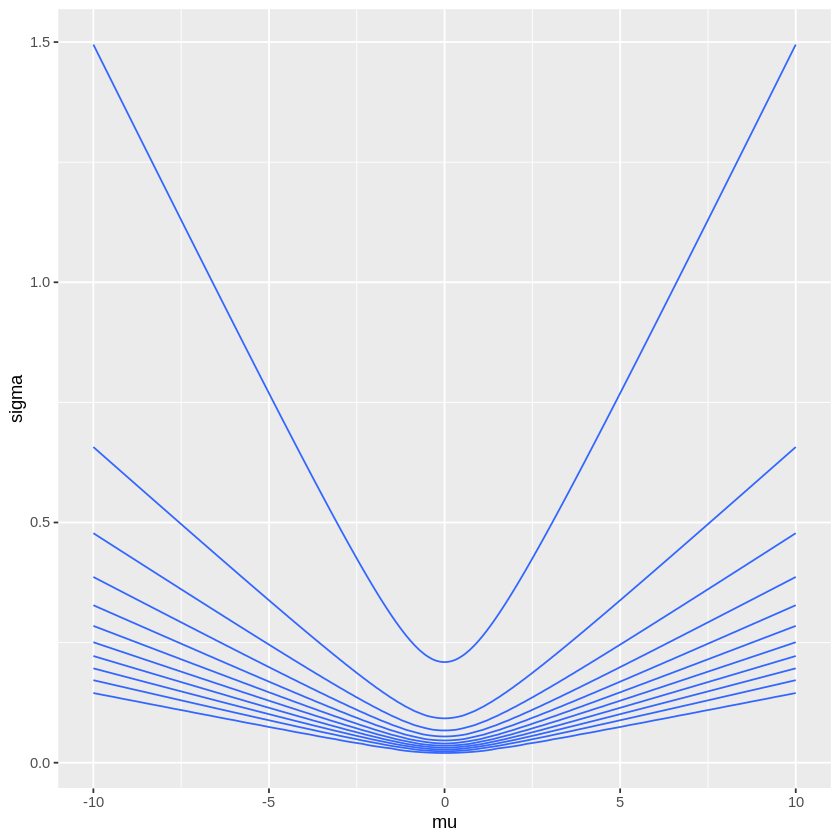

In [6]:
mu0 = 0
v = .001
alpha = 1/2 + 0
beta = .001

n = 1024
crossing(
    mu=seq(-10,10,length.out = n),
    sigma=seq(.01,10, length.out = n)
) %>%
    mutate(
        p = dng(mu0,v,alpha,beta)(mu,sigma)
    ) %>%
ggplot() +
    geom_contour(aes(mu,sigma,z=p))

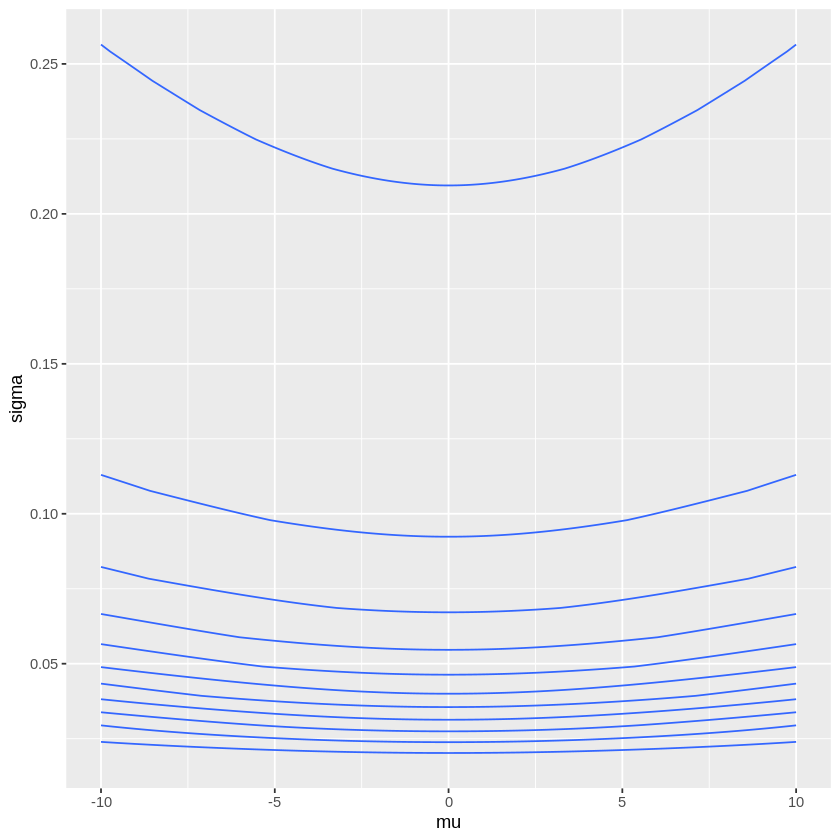

In [7]:
mu0 = 0
v = .00001
alpha = 1/2 + 0
beta = .001

n = 1024
crossing(
    mu=seq(-10,10,length.out = n),
    sigma=seq(.01,10, length.out = n)
) %>%
    mutate(
        p = dng(mu0,v,alpha,beta)(mu,sigma)
    ) %>%
ggplot() +
    geom_contour(aes(mu,sigma,z=p))

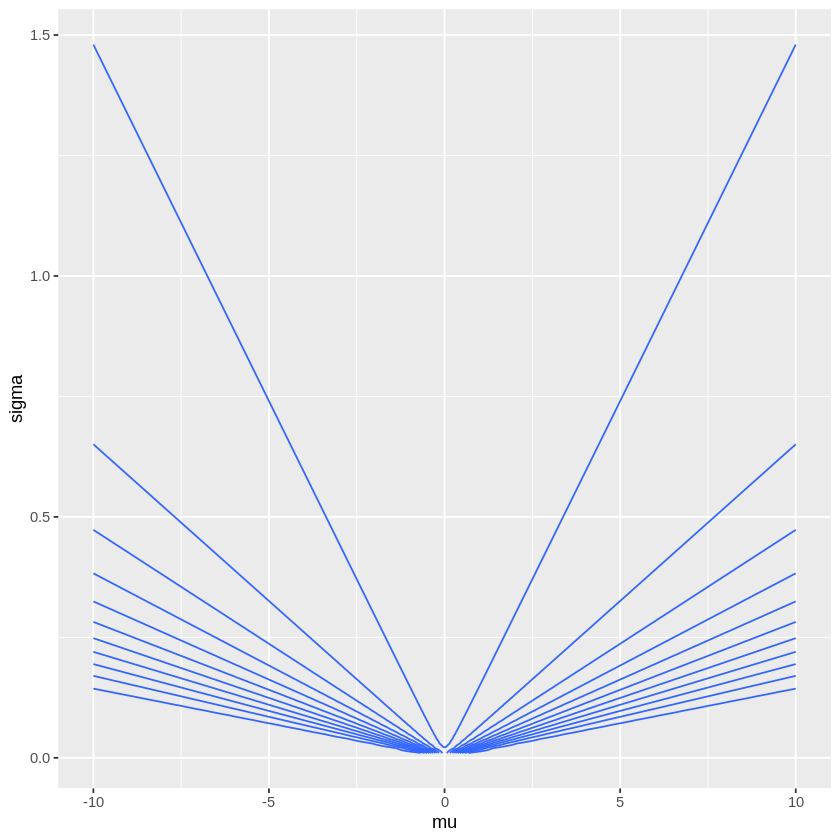

In [8]:
mu0 = 0
v = .001
alpha = 1/2 + 0
beta = .00001

n = 1024
crossing(
    mu=seq(-10,10,length.out = n),
    sigma=seq(.01,10, length.out = n)
) %>%
    mutate(
        p = dng(mu0,v,alpha,beta)(mu,sigma)
    ) %>%
ggplot() +
    geom_contour(aes(mu,sigma,z=p))

In [27]:
lapply(strsplit('tidyverse lubridate zoo', split = ' ')[[1]],
       \(x) require(x, character.only = TRUE))
fig = \(width,height) options(repr.plot.width=width, repr.plot.height=height)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

$$
\def\d{\,{\rm d}}
\def\then{\Longrightarrow}
\def\R{{\cal R}}
\begin{align}
& \R(s) P(p) f_p(\tau) = S(s) b_s(-\tau) 
& \tau = s-p\\
\then 
& b_s(-\tau) \sim \exp(R(s-\tau)) f(\tau)\\ 
\then
& \R(s) = \frac{\exp(R(s))}{\int \exp(R(s-u)) f(u) \d u} \\
\then
& \R(s) \approx \frac{1}{\int \exp(-r(s)u) f(u) \d u} 
\end{align}
$$

$$\begin{align}
& \R(s-\tau) P(s) \exp(R(s-\tau) - R(s)) f(\tau) = S(s) \R(s-\tau) = &
\then 
\end{align}$$

In [11]:
#RR(death|2nd/unvax,hosp)
(7.06/4.79) / (130.14/59.17)
# RR(death|3rd/unvax,hosp)
(.21/4.79) / (14.82/59.17)
# RR(death|3rd/2nd,hosp)
(.21/7.06) / (14.82/130.14)

[1] 0.6701314

[1] 0.1750399

[1] 0.2612024

In [15]:
# RR(death|2nd/unvax,inf)
(7.06/4.79) / (2499.52/1092.80)
# RR(death|3rd/unvax,inf)
(.21/4.79) / (1466.76/1092.80)
# RR(death|3rd/2nd,inf)
(.21/7.06) / (1466.76/2499.52)

[1] 0.6443966

[1] 0.0326637

[1] 0.05068882

In [11]:
owid.covid = read_csv('../data/owid/public/data/owid-covid-data.csv')

Rows: 154561 Columns: 67

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): iso_code, continent, location, tests_units
dbl  (62): total_cases, new_cases, new_cases_smoothed, total_deaths, new_dea...
date  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [24]:
covid = owid.covid %>%
    transmute(
        iso_code,
        location,
        date,
        new_cases,
        new_deaths,
        icu=icu_patients,
        hosp=hosp_patients,
        vax1 = people_vaccinated,
        vax2 = people_fully_vaccinated,
        vax3 = total_boosters,
    )    

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 3438 row(s) containing missing values (geom_path).”


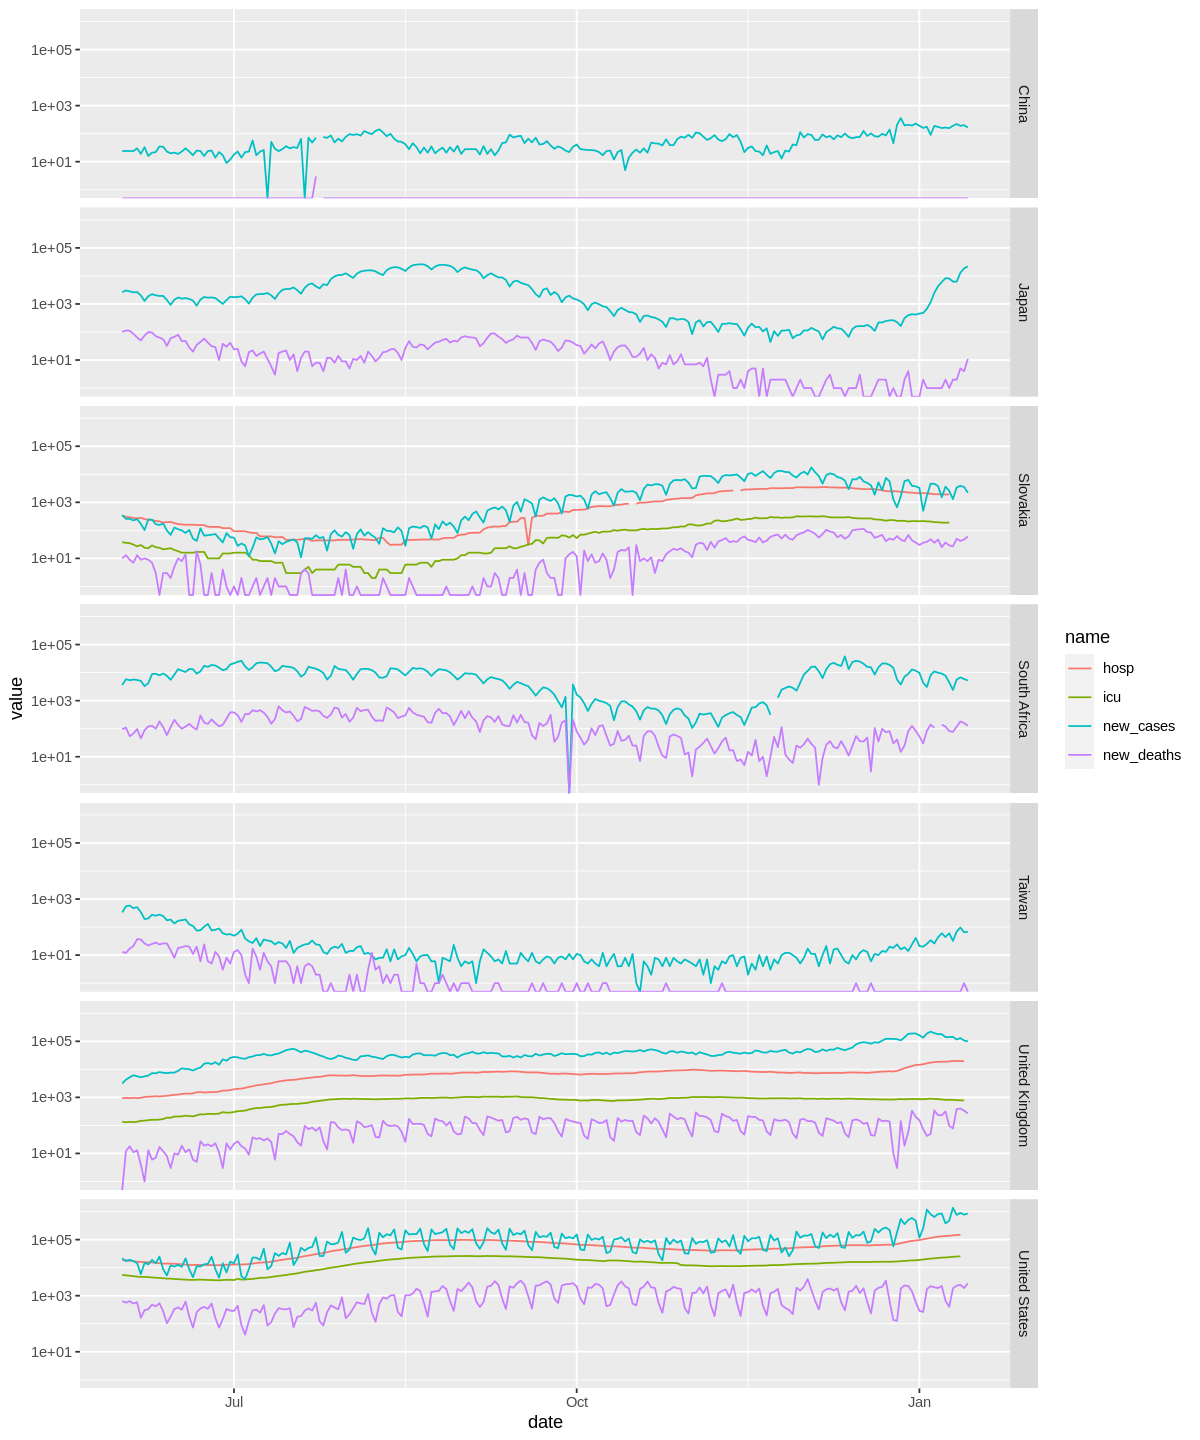

In [78]:
covid %>%
    filter(iso_code %in% c('GBR', 'USA', 'JPN', 'TWN', 'CHN', 'SVK', 'ZAF')) %>%
    select(date, location, new_cases, icu, hosp, new_deaths) %>%
    pivot_longer(-c(date, location)) %>%
    group_by(name, location) %>%
    complete(date = full_seq(date, period = 1)) %>%
    # mutate(value = rollmean(value, k = 7, na.pad = TRUE)) %>%
    ungroup() %>%
ggplot() +
    facet_grid(location ~ .) +
    geom_line(aes(date, value, color=name)) +
    scale_y_log10() -> g

fig(10,12)
g + scale_x_date(limits = ymd(c('2021/6/1',NA)))